In [1]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skbio.stats.distance import anosim
from skbio.stats.distance import permanova

In [2]:
df = pd.read_csv('Permanova_T2_filtered_greater_00001.csv')
ids = list(df.columns.values)
df = df.T
data = df.values.tolist()
bc_dm = beta_diversity("braycurtis", data, ids)
bc_pcoa = pcoa(bc_dm)

/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.015005705010678666 and the largest is 0.6478133954861589.
  RuntimeWarning


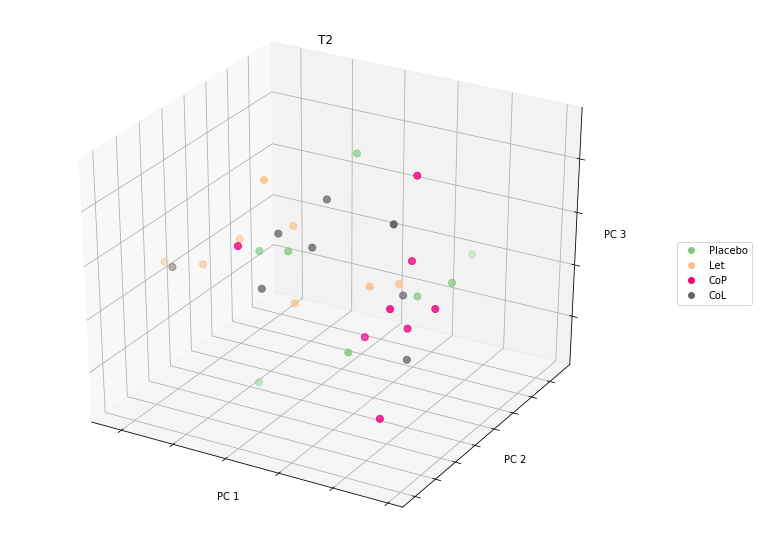

In [3]:
mapping = pd.read_csv('Deseq2_T2_mapping.csv', index_col=0)
ax = bc_pcoa.plot(mapping, 'Treatment', axis_labels=('PC 1', 'PC 2', 'PC 3'), title='T2', cmap='Accent', s=50)
ax.set_size_inches(12, 8)

In [4]:
results = anosim(bc_dm, mapping, column='Treatment', permutations=999)
results

method name                  ANOSIM
test statistic name               R
sample size                      32
number of groups                  4
test statistic            0.0670573
p-value                       0.109
number of permutations          999
Name: ANOSIM results, dtype: object

In [7]:
results = permanova(bc_dm, mapping, column='Treatment', permutations=999)
results

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      32
number of groups                  4
test statistic              2.31759
p-value                       0.036
number of permutations          999
Name: PERMANOVA results, dtype: object

## R^2

In [8]:
1-(1+2.31759 * (3/29))**-1

0.19338621196642147